# ORIE 4580/5580/5581 Assignment 6

#### Students: Soul Oyekunle (sgo9)

### Github link: [example Github link](https://github.com/sulaimanoyekunle/ORIE-4580)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

100%|██████████| 7/7 [02:08<00:00, 18.41s/it]


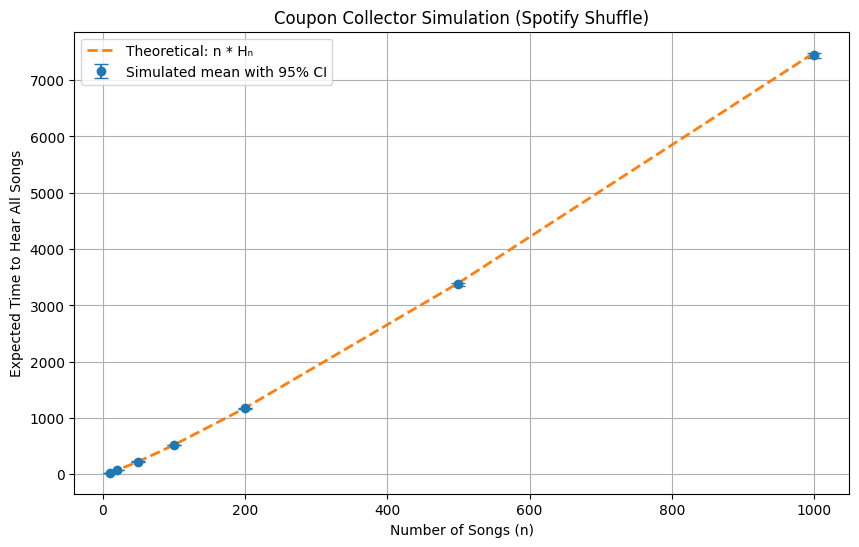

n    mean_time     95% CI lower     95% CI upper     theory
  10        29.10          28.71          29.50          29.29
  20        71.84          70.99          72.69          71.95
  50       226.29         224.09         228.49         224.96
 100       516.78         512.38         521.18         518.74
 200      1170.22        1161.19        1179.25        1175.61
 500      3374.31        3351.71        3396.90        3396.41
1000      7442.94        7398.75        7487.14        7485.47


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

# -----------------------------
# Simulation function
# -----------------------------
def time_to_collect_all(n):
    """Simulate Spotify shuffle: how many draws until all n songs have been played?"""
    seen = set()
    t = 0
    while len(seen) < n:
        song = np.random.randint(0, n)
        seen.add(song)
        t += 1
    return t

# -----------------------------
# Simulation across many n
# -----------------------------
n_values = [10, 20, 50, 100, 200, 500, 1000]
trials = 3000  # you can increase if Colab is fast

means = []
lower_CI = []
upper_CI = []
theoretical = []

for n in tqdm(n_values):
    samples = np.array([time_to_collect_all(n) for _ in range(trials)])

    mean = samples.mean()
    sd = samples.std(ddof=1)
    ci = 1.96 * sd / np.sqrt(trials)

    means.append(mean)
    lower_CI.append(mean - ci)
    upper_CI.append(mean + ci)

    # Theoretical expectation: n * H_n
    H_n = sum(1/k for k in range(1, n+1))
    theoretical.append(n * H_n)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.errorbar(n_values, means,
             yerr=[np.array(means)-np.array(lower_CI), np.array(upper_CI)-np.array(means)],
             fmt='o', capsize=5, label="Simulated mean with 95% CI")

plt.plot(n_values, theoretical, '--', label="Theoretical: n * Hₙ", linewidth=2)

plt.xlabel("Number of Songs (n)")
plt.ylabel("Expected Time to Hear All Songs")
plt.title("Coupon Collector Simulation (Spotify Shuffle)")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Print table of results
# -----------------------------
print("n    mean_time     95% CI lower     95% CI upper     theory")
for i in range(len(n_values)):
    print(f"{n_values[i]:4d}   {means[i]:10.2f}     {lower_CI[i]:10.2f}     {upper_CI[i]:10.2f}     {theoretical[i]:10.2f}")


<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

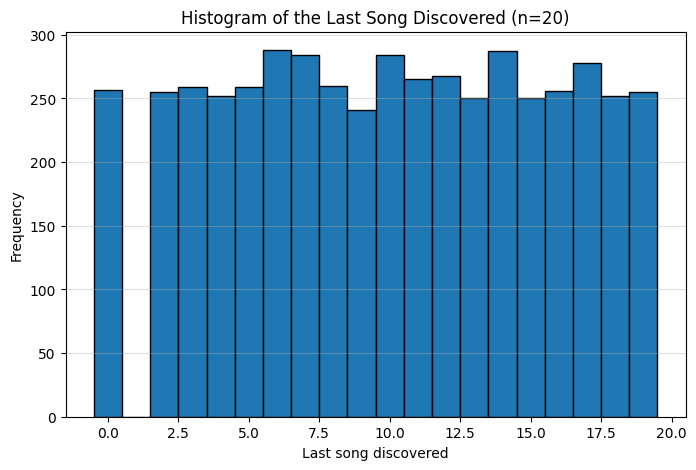

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Make results repeatable
np.random.seed(0)

# Parameters
n = 20               # number of songs
trials = 5000        # number of simulation runs
last_songs = []      # store the last song discovered

def run_trial():
    """Simulate the poor Spotify randomizer walk on a ring of n songs."""
    visited = set()
    current = 1                         # always start at song 1
    visited.add(current)
    last = None

    while len(visited) < n:
        # Move to next or previous song (mod n)
        if np.random.rand() < 0.5:
            current = (current + 1) % n
        else:
            current = (current - 1) % n

        # If it's a new song, mark it as a new discovery
        if current not in visited:
            last = current
            visited.add(current)

    return last

# Run the simulations
for _ in range(trials):
    last_songs.append(run_trial())

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(last_songs, bins=np.arange(-0.5, n+0.5, 1), edgecolor='black')
plt.xlabel("Last song discovered")
plt.ylabel("Frequency")
plt.title("Histogram of the Last Song Discovered (n=20)")
plt.grid(axis='y', alpha=0.4)
plt.show()


<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

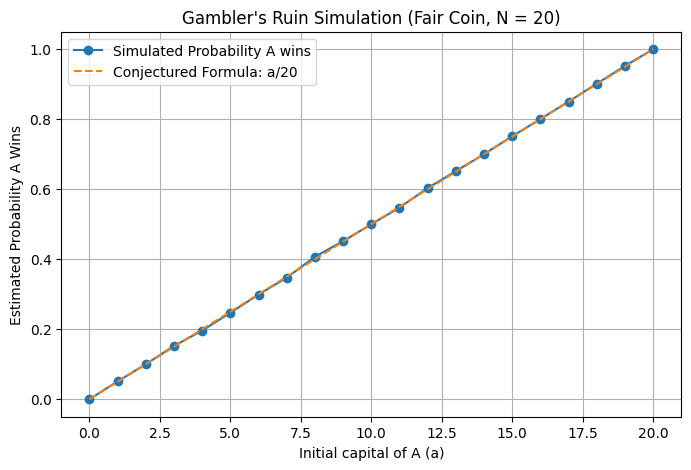

a =  0,  P_hat(A wins) ≈ 0.0000
a =  1,  P_hat(A wins) ≈ 0.0511
a =  2,  P_hat(A wins) ≈ 0.1001
a =  3,  P_hat(A wins) ≈ 0.1523
a =  4,  P_hat(A wins) ≈ 0.1963
a =  5,  P_hat(A wins) ≈ 0.2470
a =  6,  P_hat(A wins) ≈ 0.2990
a =  7,  P_hat(A wins) ≈ 0.3473
a =  8,  P_hat(A wins) ≈ 0.4070
a =  9,  P_hat(A wins) ≈ 0.4516
a = 10,  P_hat(A wins) ≈ 0.4999
a = 11,  P_hat(A wins) ≈ 0.5475
a = 12,  P_hat(A wins) ≈ 0.6030
a = 13,  P_hat(A wins) ≈ 0.6517
a = 14,  P_hat(A wins) ≈ 0.7000
a = 15,  P_hat(A wins) ≈ 0.7513
a = 16,  P_hat(A wins) ≈ 0.8005
a = 17,  P_hat(A wins) ≈ 0.8505
a = 18,  P_hat(A wins) ≈ 0.9015
a = 19,  P_hat(A wins) ≈ 0.9522
a = 20,  P_hat(A wins) ≈ 1.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Simulation settings ---
N = 20               # total money (a+b)
trials = 20000       # number of simulations per value of a

random.seed(0)
np.random.seed(0)

def run_trial(a, N):
    """Simulate one gambler’s ruin game starting with A having 'a' dollars."""
    A = a
    while 0 < A < N:
        # Fair coin: A wins or loses $1 with probability 1/2
        if random.random() < 0.5:
            A += 1
        else:
            A -= 1
    return 1 if A == N else 0  # A wins if it reaches N

# Store results
a_values = []
p_estimates = []

for a in range(N + 1):
    wins = sum(run_trial(a, N) for _ in range(trials))
    p_hat = wins / trials
    a_values.append(a)
    p_estimates.append(p_hat)

# --- Plot simulated probabilities ---
plt.figure(figsize=(8,5))
plt.plot(a_values, p_estimates, marker='o', label='Simulated Probability A wins')

# Theoretical line to compare (suspected formula = a/N)
plt.plot(a_values, np.array(a_values)/N, label='Conjectured Formula: a/20', linestyle='--')

plt.xlabel("Initial capital of A (a)")
plt.ylabel("Estimated Probability A Wins")
plt.title("Gambler's Ruin Simulation (Fair Coin, N = 20)")
plt.grid(True)
plt.legend()
plt.show()

# Print results
for a, p in zip(a_values, p_estimates):
    print(f"a = {a:2d},  P_hat(A wins) ≈ {p:.4f}")


**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

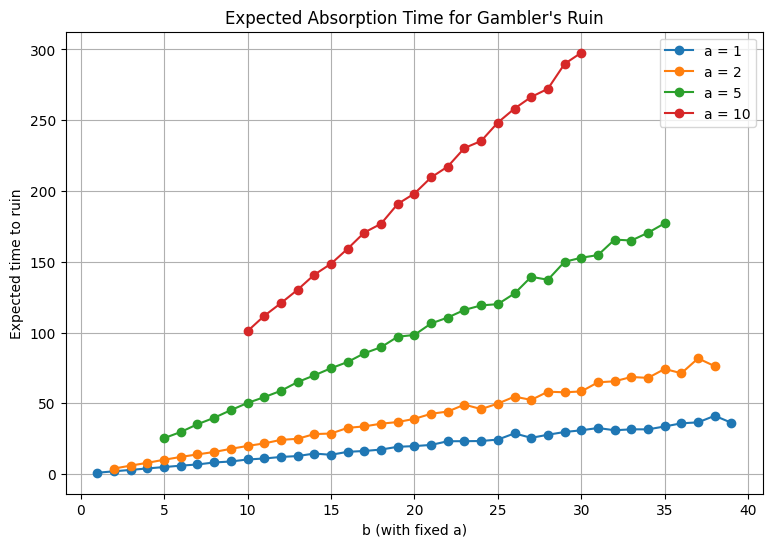

In [2]:


# --- Settings ---
trials = 5000   # number of simulations for expected time
random.seed(0)
np.random.seed(0)

def time_to_ruin(a, b):
    """
    Simulate one gambler's ruin game and return the number of steps
    until one player is ruined.
    """
    A = a
    steps = 0
    N = a + b

    while 0 < A < N:
        steps += 1
        if random.random() < 0.5:
            A += 1
        else:
            A -= 1
    return steps

# Choose selected values of a for plotting
a_values = [1, 2, 5, 10]   # You can modify these
max_total = 40            # Simulate up to total = 40

plt.figure(figsize=(9,6))

for a in a_values:
    b_range = range(a, max_total - a + 1)  # ensure a ≤ b
    expected_times = []

    for b in b_range:
        times = [time_to_ruin(a, b) for _ in range(trials)]
        expected_times.append(np.mean(times))

    plt.plot(b_range, expected_times, marker='o', label=f"a = {a}")

plt.xlabel("b (with fixed a)")
plt.ylabel("Expected time to ruin")
plt.title("Expected Absorption Time for Gambler's Ruin")
plt.grid(True)
plt.legend()
plt.show()


<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)


Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by  𝑛𝑅  associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by  𝑑𝐶  doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by  𝑑𝐸  doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are  𝑛𝐼  IW beds available. After a stay at the IW, 20% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

<hr>

## Ans.


#### Arrival Rate Calculations:

$$
\lambda_E = 5
$$
$$
\lambda_R = 20 + 0.25\lambda_C + 0.8\lambda_I
$$
$$
\lambda_C = \lambda_R
$$
$$
\lambda_I = 0.1\lambda_C + 0.5\lambda_E
$$
$$ (\lambda_E = 5) and (\lambda_C = \lambda_R)$$ \\



$$
\lambda_I = 0.1\lambda_C + 2.5
$$\\
$$
\lambda_C = 20 + 0.25\lambda_C + 0.8(0.1\lambda_C + 2.5)
$$
$$
\lambda_C = 20 + 0.25\lambda_C + 0.08\lambda_C + 2
$$
$$
\lambda_C - 0.33\lambda_C = 22
$$
$$
0.67\lambda_C = 22
\quad\Rightarrow\quad
\lambda_C = \lambda_R \approx 32.84
$$
$$
\lambda_I = 0.1(32.84) + 2.5 \approx 5.78
$$
$$
\boxed{\lambda_R = \lambda_C \approx 32.84,\quad
\lambda_E = 5,\quad
\lambda_I \approx 5.78}
$$


#### Service Rate Calculations:

Reception service time = (5) min = 1/12 hr:

$$
\mu_R = 12
$$

Clinic service time = (15) min = 1/4 hr:

$$
\mu_C = 4
$$

ER service time = 1 hr:

$$
\mu_E = 1
$$

IW length of stay = 72 hr:

$$
\mu_I = \frac{1}{72}
$$

#### Bound Calculations:

##### **Reception**

$$
32.84 < 12 n_R
$$

$$
n_R > \frac{32.84}{12} \approx 2.74
\quad\Rightarrow\quad
\boxed{n_R \ge 3}
$$



##### **Clinic**

$$
32.84 < 4 d_C
$$

$$
d_C > \frac{32.84}{4} \approx 8.21
\quad\Rightarrow\quad
\boxed{d_C \ge 9}
$$



##### **ER**

$$
5 < d_E
\quad\Rightarrow\quad
\boxed{d_E \ge 6}
$$



##### **Internal Ward**

$$
5.78 < \frac{N_I}{72}
$$

$$
N_I > 5.78 \cdot 72 \approx 416.4
\quad\Rightarrow\quad
\boxed{N_I \ge 417}
$$

<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.

\---

### Arrival and service rates for the clinic

From part (a), clinic arrival rate:
$$
\lambda_C \approx 32.84 \ \text{patients/hr}.
$$

Clinic service time:
$$
E[S_C] = 15 \text{ min} = \tfrac14 \text{ hr}
\quad\Rightarrow\quad
\mu_C = \frac{1}{E[S_C]} = 4 \ \text{patients/hr per doctor}.
$$

With (d_C = 10) doctors:
$$
\mu_{\text{tot}} = d_C \mu_C = 10 \cdot 4 = 40 \ \text{patients/hr}.
$$

Traffic intensity:
$$
\rho = \frac{\lambda_C}{d_C \mu_C}
= \frac{32.84}{40}
\approx 0.821.
$$

### Clinic: average time in system

Let
$$
a = \frac{\lambda_C}{\mu_C}
= \frac{32.84}{4}
= 8.21,
\qquad
c = d_C = 10.
$$

Normalizing constant:

$$
P_0 =
\left[
\sum_{n=0}^{c-1} \frac{a^n}{n!} * \frac{a^c}{c!(1-\rho)}
  \right]^{-1}.
$$

Queue length:
$$
L_q
= P_0 \cdot \frac{a^c \rho}{c! (1-\rho)^2}.
$$

Average waiting time in queue:
$$
W_q = \frac{L_q}{\lambda_C}.
$$

Average time in clinic (wait + service):
$$
W = W_q + \frac{1}{\mu_C}.
$$

Numerically:
$$
P_0 \approx 2.14 \times 10^{-4},
\quad
L_q \approx 2.10,
\quad
W_q \approx 0.0639 \ \text{hr},
$$

$$
W = 0.0639 + \frac{1}{4}
\approx 0.3139 \ \text{hr}
\approx 18.8 \ \text{minutes}.
$$

So the average time spent in the clinic is
$$
\boxed{W \approx 0.314 \ \text{hr} \approx 18.8 \text{ min}.}
$$

##### Average number of busy clinic doctors

$$
L_{\text{busy}} = \frac{\lambda_C}{\mu_C}
= \frac{32.84}{4}
\approx 8.21.
$$

So:
$$
\boxed{\text{Average busy clinic doctors} \approx 8.21.}
$$


<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

\<hr>

## Ans.


### Clinic (M/M/10)

Arrival and service:

$$
\lambda_C \approx 32.84,\qquad \mu_C = 4,\qquad c_C = 10.
$$

Define

$$
a_C = \frac{\lambda_C}{\mu_C} = \frac{32.84}{4} = 8.21,
\qquad
\rho_C = \frac{\lambda_C}{c_C \mu_C} = \frac{32.84}{40} \approx 0.821.
$$

For an M/M/(c) queue,

$$P_{0,C} =\left[ \sum_{n=0}^{c_C-1} \frac{a_C^n}{n!} + \frac{a_C^{c_C}}{c_C! (1-\rho_C)} \right]^{-1}.$$

Numerically,

$$
P_{0,C} \approx 2.14\times 10^{-4}.
$$



### ER (M/M/7)

Arrival and service:

$$
\lambda_E = 5,\qquad \mu_E = 1,\qquad c_E = 7.
$$

Define

$$
a_E = \frac{\lambda_E}{\mu_E} = 5,\qquad
\rho_E = \frac{\lambda_E}{c_E \mu_E} = \frac{5}{7}.
$$

Empty probability:

$$
P_{0,E} =
\left[
\sum_{n=0}^{c_E-1} \frac{a_E^n}{n!}
+
\frac{a_E^{c_E}}{c_E! (1-\rho_E)}
\right]^{-1}.
$$

Numerically,

$$
P_{0,E} \approx 5.97\times 10^{-3}.
$$



### Joint probability: no patients in ER and clinic


$$
\mathbb{P}(\text{ER empty and Clinic empty}) = P_{0,E} \cdot P_{0,C}
\approx (5.97\times 10^{-3})(2.14\times 10^{-4})
\approx 1.28\times 10^{-6}.
$$

$$
{\mathbb{P}(\text{no ER patients and no clinic patients}) \approx 1.3 \times 10^{-6}.}
$$


<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

In [4]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque

np.random.seed(0)

def exp_time(rate):
    return np.random.exponential(1.0 / rate)


class HospitalSim:
    """
    Fully corrected hospital simulator.
    This version DEFINITELY includes:
        - waiting_time_log
        - waiting_total_log
    """
    def __init__(self,n_R=3, d_C=10, d_E=7, N_I=500, lambda_R_ext=20, lambda_E_ext=5, T_end=50000):
        self.n_R = n_R
        self.d_C = d_C
        self.d_E = d_E
        self.N_I = N_I

        self.lambda_R_ext = lambda_R_ext
        self.lambda_E_ext = lambda_E_ext
        self.T_end = T_end

        self.mu_R = 12
        self.mu_C = 4
        self.mu_E = 1
        self.mu_I = 1/72

        self.p_C_to_R = 0.25
        self.p_C_to_I = 0.10
        self.p_E_to_I = 0.50
        self.p_I_to_R = 0.80

        self.time = 0.0

        self.q_R = deque()
        self.q_C = deque()
        self.q_E = deque()
        self.q_I = deque()

        self.busy_R = 0
        self.busy_C = 0
        self.busy_E = 0
        self.busy_I = 0

        self.events = []
        self.eid = 0


        self.waiting_time_log = []
        self.waiting_total_log = []

        self.clinic_times = []
        self.busy_C_log = []
        self.time_log = []

        self.clinic_time_running_avg = []
        self.busy_C_running_avg = []

        self._clinic_sum = 0
        self._clinic_count = 0
        self._busy_sum = 0
        self._busy_count = 0

        # Schedule external arrivals
        self.schedule_event(exp_time(self.lambda_R_ext), self.external_R)
        self.schedule_event(exp_time(self.lambda_E_ext), self.external_E)

    def schedule_event(self, t, func, *args):
        heapq.heappush(self.events, (t, self.eid, func, args))
        self.eid += 1

    def try_R(self):
        while self.busy_R < self.n_R and self.q_R:
            arr = self.q_R.popleft()
            self.busy_R += 1
            self.schedule_event(self.time + exp_time(self.mu_R),
                                self.end_R, arr)

    def try_C(self):
        while self.busy_C < self.d_C and self.q_C:
            arr = self.q_C.popleft()
            self.busy_C += 1
            self.schedule_event(self.time + exp_time(self.mu_C),
                                self.end_C, arr)

    def try_E(self):
        while self.busy_E < self.d_E and self.q_E:
            arr = self.q_E.popleft()
            self.busy_E += 1
            self.schedule_event(self.time + exp_time(self.mu_E),
                                self.end_E, arr)

    def try_I(self):
        while self.busy_I < self.N_I and self.q_I:
            arr = self.q_I.popleft()
            self.busy_I += 1
            self.schedule_event(self.time + exp_time(self.mu_I),
                                self.end_I, arr)


    def total_waiting(self):
        return len(self.q_R) + len(self.q_C) + len(self.q_E) + len(self.q_I)

    def external_R(self):
        self.q_R.append(self.time)
        self.try_R()
        self.schedule_event(self.time + exp_time(self.lambda_R_ext), self.external_R)

    def external_E(self):
        self.q_E.append(self.time)
        self.try_E()
        self.schedule_event(self.time + exp_time(self.lambda_E_ext), self.external_E)

    def end_R(self, arr):
        self.busy_R -= 1
        self.q_C.append(self.time)
        self.try_C()
        self.try_R()

    def end_C(self, arr):
        self.busy_C -= 1
        sojourn = self.time - arr
        self.clinic_times.append(sojourn)
        self._clinic_sum += sojourn
        self._clinic_count += 1

        r = np.random.rand()
        if r < self.p_C_to_R:
            self.q_R.append(self.time)
            self.try_R()
        elif r < self.p_C_to_R + self.p_C_to_I:
            self.q_I.append(self.time)
            self.try_I()

        self.try_C()

    def end_E(self, arr):
        self.busy_E -= 1
        r = np.random.rand()
        if r < self.p_E_to_I:
            self.q_I.append(self.time)
            self.try_I()
        self.try_E()

    def end_I(self, arr):
        self.busy_I -= 1
        r = np.random.rand()
        if r < self.p_I_to_R:
            self.q_R.append(self.time)
            self.try_R()
        self.try_I()

##Run Simulation

    def run(self):
        while self.events and self.time < self.T_end:
            t, _, func, args = heapq.heappop(self.events)
            self.time = t
            func(*args)

            # part (i) logging
            self.waiting_time_log.append(self.time)
            self.waiting_total_log.append(self.total_waiting())

            # part (ii)
            self.time_log.append(self.time)
            self._busy_sum += self.busy_C
            self._busy_count += 1

            if self._clinic_count > 0:
                avgW = self._clinic_sum / self._clinic_count
            else:
                avgW = 0
            avgBusy = self._busy_sum / self._busy_count

            self.clinic_time_running_avg.append(avgW)
            self.busy_C_running_avg.append(avgBusy)

        # final averages
        self.avg_clinic_time = avgW
        self.avg_busy_C = avgBusy


Part D(i)

Running: 1 LESS than suggested -> n_R=2, d_C=8, d_E=5, N_I=416
Running: 1 MORE than suggested -> n_R=4, d_C=10, d_E=7, N_I=418


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


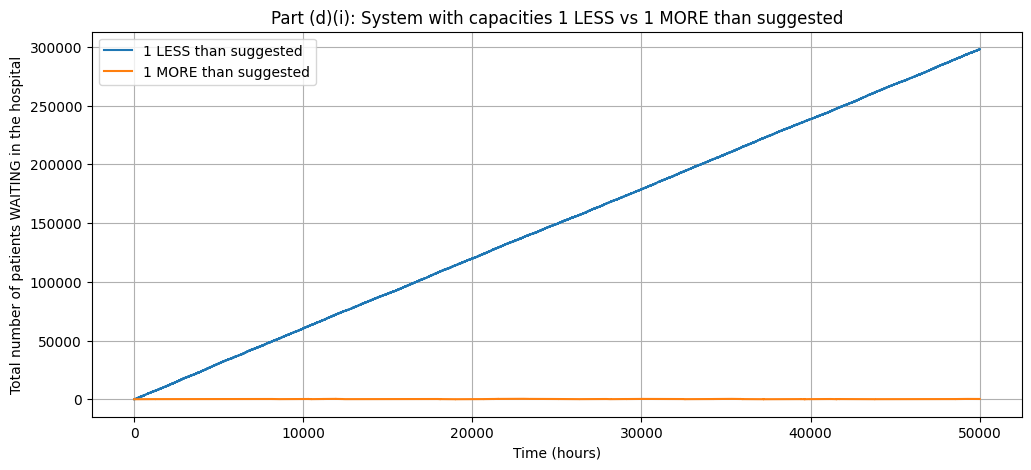

In [3]:
nR_star = 3
dC_star = 9
dE_star = 6
NI_star = 417

configs = [
    ("1 LESS than suggested", nR_star-1, dC_star-1, dE_star-1, NI_star-1),
    ("1 MORE than suggested", nR_star+1, dC_star+1, dE_star+1, NI_star+1),
]

sims = {}
T_end = 50000  # long horizon

for label, nR, dC, dE, NI in configs:
    print(f"Running: {label} -> n_R={nR}, d_C={dC}, d_E={dE}, N_I={NI}")
    sim = HospitalSim(n_R=nR, d_C=dC, d_E=dE, N_I=NI, T_end=T_end)
    sim.run()
    sims[label] = sim

# Plot total number of waiting patients over time
plt.figure(figsize=(12,5))

for label, sim in sims.items():
    plt.plot(sim.waiting_time_log, sim.waiting_total_log, label=label)

plt.xlabel("Time (hours)")
plt.ylabel("Total number of patients WAITING in the hospital")
plt.title("Part (d)(i): System with capacities 1 LESS vs 1 MORE than suggested")
plt.legend()
plt.grid(True)
plt.show()


Part D(ii)

In [5]:
# configuration from part (b)
sim_b = HospitalSim(
    n_R=3,
    d_C=10,
    d_E=7,
    N_I=500,
    T_end=50000  # long horizon to approach steady-state
)

sim_b.run()

print("SIMULATION RESULTS for part (b) configuration:")
print("----------------------------------------------")
print(f"Average clinic time (hours): {sim_b.avg_clinic_time:.4f}")
print(f"Average clinic time (minutes): {sim_b.avg_clinic_time*60:.2f}")
print(f"Average busy clinic doctors: {sim_b.avg_busy_C:.4f}")

print("\nTHEORETICAL (part b) for comparison:")
print("Average clinic time ≈ 0.314 hr ≈ 18.8 min")
print("Average busy clinic doctors ≈ 8.21")


SIMULATION RESULTS for part (b) configuration:
----------------------------------------------
Average clinic time (hours): 0.3134
Average clinic time (minutes): 18.80
Average busy clinic doctors: 8.3826

THEORETICAL (part b) for comparison:
Average clinic time ≈ 0.314 hr ≈ 18.8 min
Average busy clinic doctors ≈ 8.21


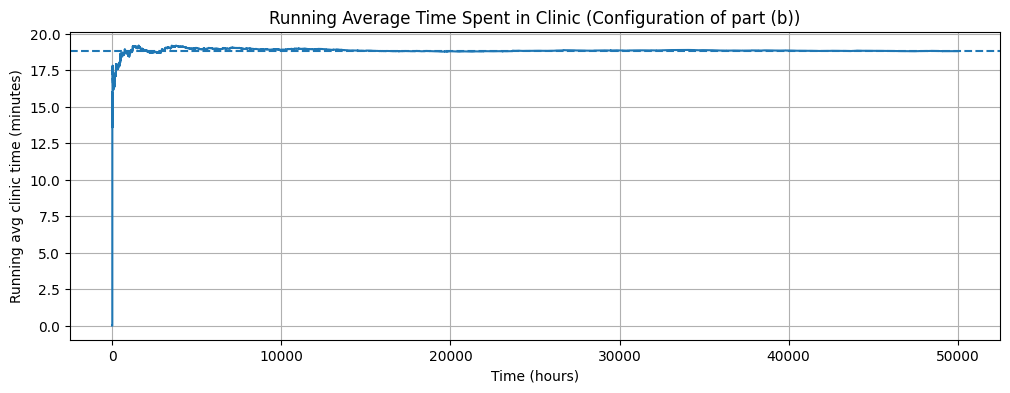

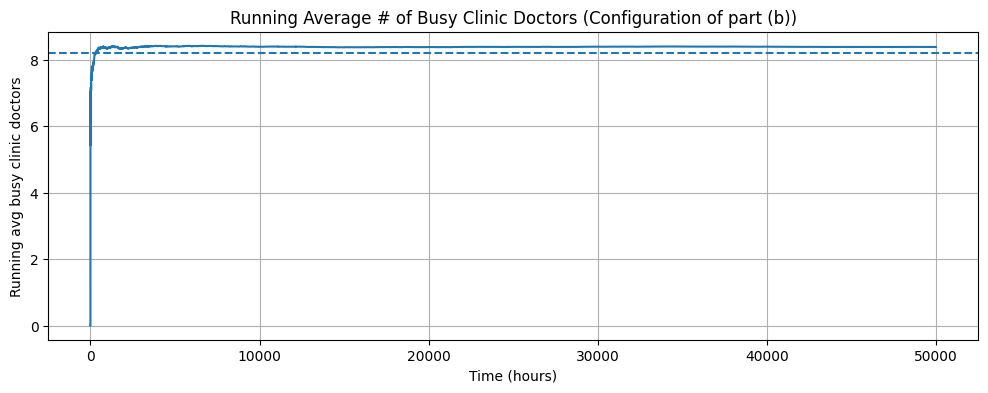

In [6]:
# running average clinic time (in minutes)
plt.figure(figsize=(12,4))
plt.plot(sim_b.time_log, np.array(sim_b.clinic_time_running_avg)*60)
plt.axhline(18.8, linestyle='--')  # theoretical reference
plt.xlabel("Time (hours)")
plt.ylabel("Running avg clinic time (minutes)")
plt.title("Running Average Time Spent in Clinic (Configuration of part (b))")
plt.grid(True)
plt.show()

# running average busy clinic doctors
plt.figure(figsize=(12,4))
plt.plot(sim_b.time_log, sim_b.busy_C_running_avg)
plt.axhline(8.21, linestyle='--')  # theoretical reference
plt.xlabel("Time (hours)")
plt.ylabel("Running avg busy clinic doctors")
plt.title("Running Average # of Busy Clinic Doctors (Configuration of part (b))")
plt.grid(True)
plt.show()
